In [184]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in the data
df = pd.read_csv('/Users/dilanhamawandy/Documents/PythonProject/movies.csv')


In [185]:
# lets take a look at the data we are working with

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-06-14,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-15,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-06-16,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-06-17,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,2001-06-06,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,2001-06-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,2001-06-08,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,2001-06-09,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [186]:
# We need to identify whether the dataset contains any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [187]:
# We will deal with our missing data by now deleting rows with missings values

df.dropna(inplace=True)

In [188]:
# Lets verify we no longer have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [190]:
# We will identify our data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [193]:
# Change the data type within the 'budget', 'gross', and 'votes' to get rid of the decimal point

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-06-14,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-15,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-06-16,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-06-17,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2001-05-22,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,2001-05-23,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,2001-05-24,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,2001-05-25,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [196]:
# Lets correct the year column by extracting the year frm the "released" column and store it in a new column "Year"

df['yearcorrect'] = df['released'].astype(str).str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year,yearcorrect
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,1980-06-14,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-15,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,1980-06-16,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980,1980
4,Caddyshack,R,Comedy,1980,1980-06-17,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2001-05-22,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2001,2001
7649,Sonic the Hedgehog,PG,Action,2020,2001-05-23,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2001,2001
7650,Dolittle,PG,Adventure,2020,2001-05-24,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2001,2001
7651,The Call of the Wild,PG,Adventure,2020,2001-05-25,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2001,2001


In [199]:
# Lets order our data by gross descending to get a different view of our data

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)


In [200]:
# We will now drop any duplicates we may have

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year,yearcorrect
5445,Avatar,PG-13,Action,2009,1995-05-11,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,1995,1995
7445,Avengers: Endgame,PG-13,Action,2019,2000-10-31,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2000,2000
3045,Titanic,PG-13,Drama,1997,1988-10-14,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1988,1988
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,1998-09-10,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,1998,1998
7244,Avengers: Infinity War,PG-13,Action,2018,2000-04-13,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,1995-11-22,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,1995,1995
2434,Philadelphia Experiment II,PG-13,Action,1993,1987-02-11,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1987,1987
3681,Ginger Snaps,Not Rated,Drama,2000,1990-07-12,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,1990,1990
272,Parasite,R,Horror,1982,1981-03-12,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1981,1981


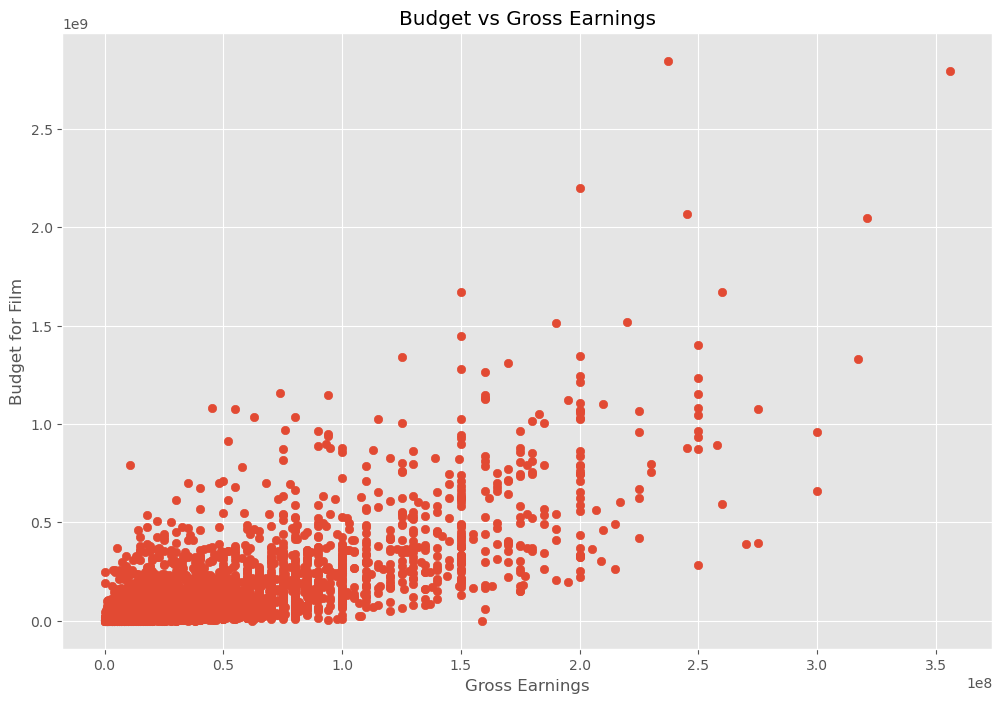

In [201]:
# Lets create a scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

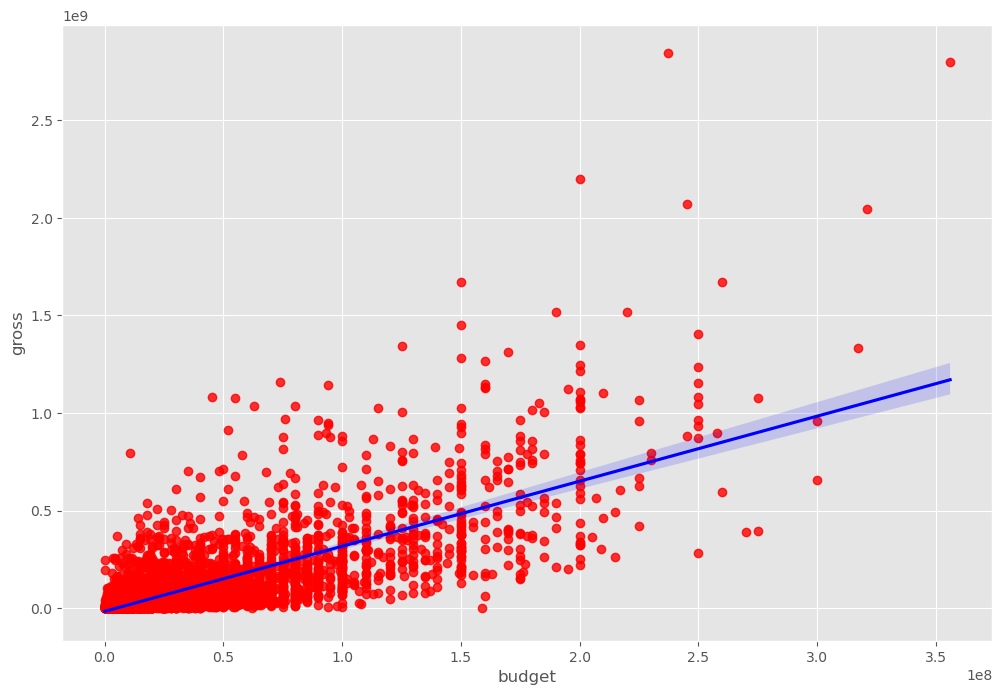

In [205]:
# Now we will use a regression plot comparing budget vs. Gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})



In [210]:
# Lets create a correlation matrix between all numeric columns using Pearson, Kendall, Spearman

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000


In [211]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='kendall')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.039389  0.296512  0.220833  0.239539  0.064824
score    0.039389  1.000000  0.350185 -0.006406  0.124943  0.292254
votes    0.296512  0.350185  1.000000  0.346274  0.553625  0.205344
budget   0.220833 -0.006406  0.346274  1.000000  0.512057  0.231278
gross    0.239539  0.124943  0.553625  0.512057  1.000000  0.176979
runtime  0.064824  0.292254  0.205344  0.231278  0.176979  1.000000


In [212]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='spearman')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.057741  0.427623  0.312886  0.351045  0.095444
score    0.057741  1.000000  0.495409 -0.009971  0.183192  0.412155
votes    0.427623  0.495409  1.000000  0.493461  0.745793  0.300621
budget   0.312886 -0.009971  0.493461  1.000000  0.692958  0.330794
gross    0.351045  0.183192  0.745793  0.692958  1.000000  0.257400
runtime  0.095444  0.412155  0.300621  0.330794  0.257400  1.000000


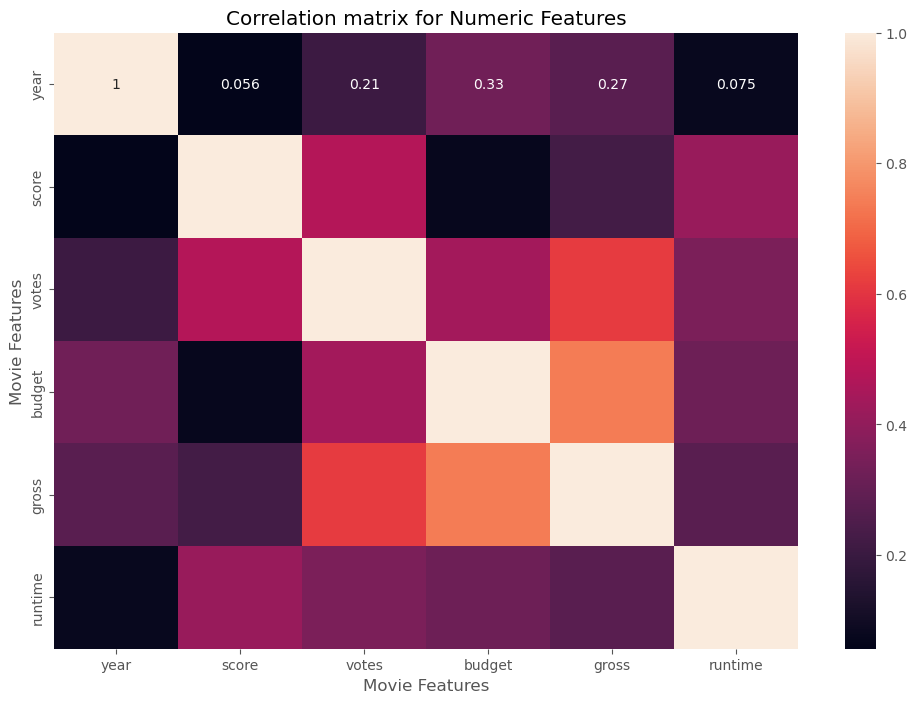

In [217]:
# We will create a heatmap to compare correlation for numeric features
# Simply another way to visualize correlation between columns

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()


In [218]:
# Lets use factorize which assigns a random numeric value for each unique categorical value

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year,yearcorrect
5445,386,5,0,2009,3731,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,15,15
7445,388,5,0,2019,5302,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,20,20
3045,4909,5,6,1997,1795,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,8,8
6663,3643,5,0,2015,4730,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,18,18
7244,389,5,0,2018,5158,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,3898,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0,15,15
2434,2969,5,0,1993,1378,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0,7,7
3681,1595,3,6,2000,2286,6.8,43000,952,1683,527,6,5000000,2554,466,108.0,10,10
272,2909,6,9,1982,154,3.9,2300,261,55,1473,47,800000,2270,582,85.0,1,1


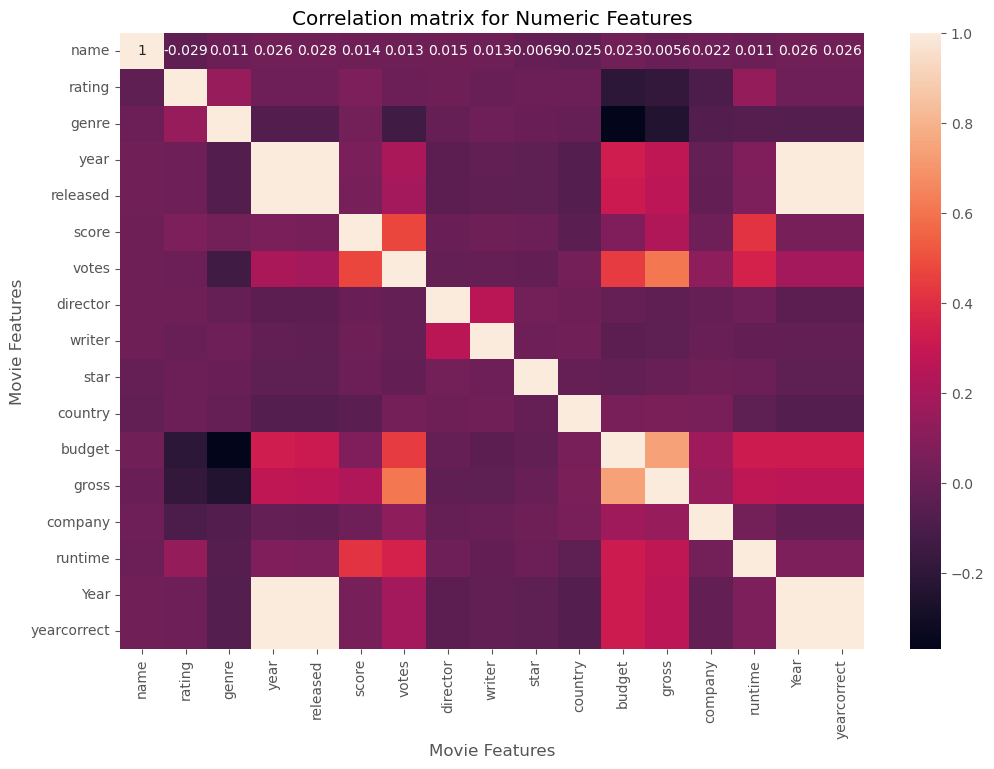

In [219]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [220]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,0.027581,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026424,0.026424
rating,-0.029234,1.000000,0.147796,0.019499,0.016504,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.018541,0.018541
genre,0.010996,0.147796,1.000000,-0.073167,-0.070934,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.068611,-0.068611
year,0.025542,0.019499,-0.073167,1.000000,0.996402,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998252,0.998252
released,0.027581,0.016504,-0.070934,0.996402,1.000000,0.048207,0.190396,-0.038704,-0.028117,-0.033267,-0.066464,0.314770,0.265700,-0.020184,0.067759,0.996128,0.996128
score,0.014450,0.065983,0.035106,0.056386,0.048207,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.045925,0.045925
votes,0.012615,0.006031,-0.135990,0.206021,0.190396,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.191859,0.191859
director,0.015246,0.014656,-0.008553,-0.038354,-0.038704,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.038224,-0.038224
writer,0.012880,-0.003149,0.017578,-0.025908,-0.028117,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.026330,-0.026330
star,-0.006882,0.009196,0.003341,-0.032157,-0.033267,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032486,-0.032486


In [221]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released       0.027581
                              ...   
yearcorrect  gross          0.263110
             company       -0.017605
             runtime        0.067719
             Year           1.000000
             yearcorrect    1.000000
Length: 289, dtype: float64

In [222]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
                              ...   
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
yearcorrect  Year           1.000000
             yearcorrect    1.000000
Length: 289, dtype: float64

In [224]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
released     Year           0.996128
yearcorrect  released       0.996128
released     yearcorrect    0.996128
Year         released       0.996128
released     year           0.996402
year         released       0.996402
Year         year           0.998252
year         Year           0.998252
yearcorrect  year           0.998252
year         yearcorrect    0.998252
name         name           1.000000
writer       writer         1.000000
Year         Year           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
Year         yearcorrect    1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
b

In [225]:
# Votes and budget have the highest correlation to gross earnings

